In [7]:
## To support python versions 2 and 3
from __future__ import division, print_function, unicode_literals

### standard imports

% matplotlib inline
import pandas as pd
import math as m
import dateutil
from datetime import date
from pandas.tseries.holiday import USFederalHolidayCalendar
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy import stats
import numpy as np
import calendar
import seaborn as sns

In [8]:
from sklearn.preprocessing import MinMaxScaler as MM
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import arma_order_select_ic
from statsmodels.api import tsa
from statsmodels.tsa.stattools import adfuller

warnings.simplefilter('ignore')
US_holidays = USFederalHolidayCalendar()

C:\Users\Lohith\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [9]:
df = pd.read_csv( "ad_table.csv" )
df.head()

,date,shown,clicked,converted,avg_cost_per_click,total_revenue,ad
0,10/1/15,65877,2339,43,0.90,641.62,ad_group_1
1,10/2/15,65100,2498,38,0.94,756.37,ad_group_1
2,10/3/15,70658,2313,49,0.86,970.90,ad_group_1
3,10/4/15,69809,2833,51,1.01,907.39,ad_group_1
4,10/5/15,68186,2696,41,1.00,879.45,ad_group_1


In [10]:
# Dimension of the dataframe:
df.shape

(2115, 7)

In [12]:
## Unique ad groups in the dataset
df['ad'].unique()

array(['ad_group_1', 'ad_group_2', 'ad_group_3', 'ad_group_4',
       'ad_group_5', 'ad_group_6', 'ad_group_7', 'ad_group_8',
       'ad_group_9', 'ad_group_10', 'ad_group_11', 'ad_group_12',
       'ad_group_13', 'ad_group_14', 'ad_group_15', 'ad_group_16',
       'ad_group_17', 'ad_group_18', 'ad_group_19', 'ad_group_20',
       'ad_group_21', 'ad_group_22', 'ad_group_23', 'ad_group_24',
       'ad_group_25', 'ad_group_26', 'ad_group_27', 'ad_group_28',
       'ad_group_29', 'ad_group_30', 'ad_group_31', 'ad_group_32',
       'ad_group_33', 'ad_group_34', 'ad_group_35', 'ad_group_36',
       'ad_group_37', 'ad_group_38', 'ad_group_39', 'ad_group_40'], dtype=object)

### Missing values

In [13]:
print("Percentage of available data for each parameter:")
print(df.count() * 100 / len(df))

Percentage of available data for each parameter:
date                  100.0
shown                 100.0
clicked               100.0
converted             100.0
avg_cost_per_click    100.0
total_revenue         100.0
ad                    100.0
dtype: float64


####  No missing data as there is 100% availability

### Data Type

In [15]:
# Date:
try:
    df['date'] = pd.to_datetime(df['date'])
except Exception as e:
    print(e)
    print("Please check for data points in the 'date' column that are in unacceptable format")

    
### If the date is in any unacceptable format then the above step would fail. 
## One more step in validating datetime is to plot any other parameter across the dates.

In [16]:
# Type setting on each column:
def typeset(data, dtype):
    try:
        data = data.astype(dtype)
    except Exception as e:
        print("Exception on columns %s: %s" %(data.name, e))
    return data
    # This step will print the exception triggered if the data in the corresponding column 
    # cannot be forced to a particular format due to some data values in unacceptable formats

In [18]:
# List of columns and expected datatypes:
cols = [('shown', int), ('clicked', int), ('converted', int), 
        ('avg_cost_per_click', float), ('total_revenue', float)]

for col, dtype in cols:
    df[col] = typeset(df[col], dtype)
    
### Each column is checked for erroneous data such as data in different format than expected 

### Outliers and Data Pattern

#### I will be checking it with respect to each column

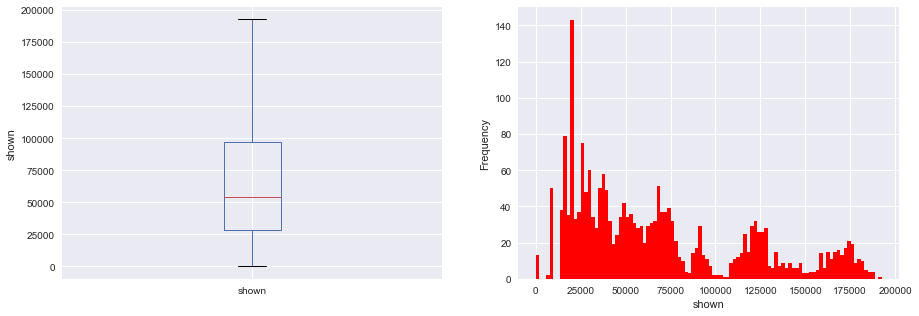

In [22]:
# Shown:


fig, axes = plt.subplots(1, 2, figsize=(15,5))
df.shown.plot.box(ax = axes[0])
df.shown.plot.hist(bins = 100, ax = axes[1], color = 'red')
axes[0].set_ylabel("shown")
axes[1].set_xlabel("shown")

Considering all the ad groups, there seems to be no outliers as part of "shown column"

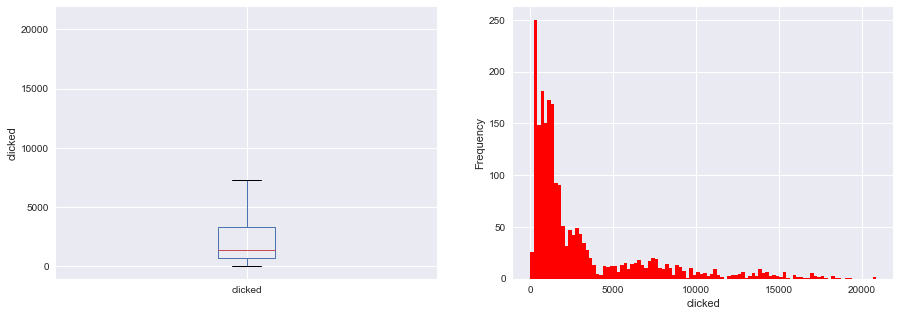

In [25]:
# Clicked:

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
df.clicked.plot.box(ax = axes[0])
df.clicked.plot.hist(bins = 100, ax = axes[1], color = 'red')
axes[0].set_ylabel("clicked")
axes[1].set_xlabel("clicked")

In [26]:
##  To check for the condition 'clicked' <= 'shown'. It is impossible to have clicks more than the ads displayed.


df[ df['clicked'] > df['shown'] ]

,date,shown,clicked,converted,avg_cost_per_click,total_revenue,ad


Clicked column is free from outliers as the number of clicks is well within the ads shown

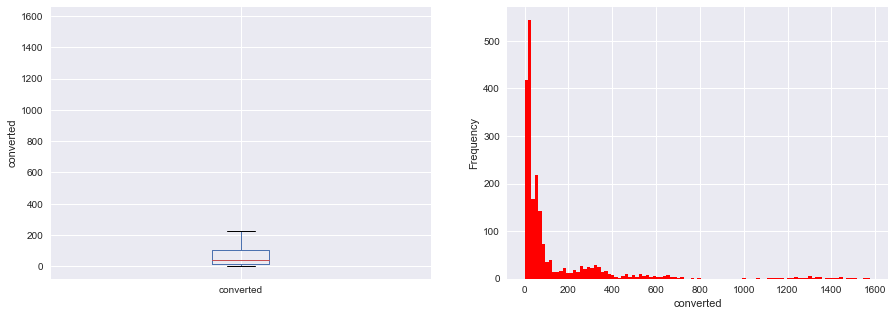

In [27]:
# converted:

fig, axes = plt.subplots(1, 2, figsize = (15, 5))
df.converted.plot.box(ax = axes[0])
df.converted.plot.hist(bins = 100, ax = axes[1], color = 'red')
axes[0].set_ylabel("converted")
axes[1].set_xlabel("converted")

No outliers in the "Converted" column as the values seems to be within the expected range.


Let's check the values as it should be less than the "clicked" column.

In [28]:
df[df['converted'] > df['clicked']]

,date,shown,clicked,converted,avg_cost_per_click,total_revenue,ad


Seems good so far, clicked ads is greater than converted ads

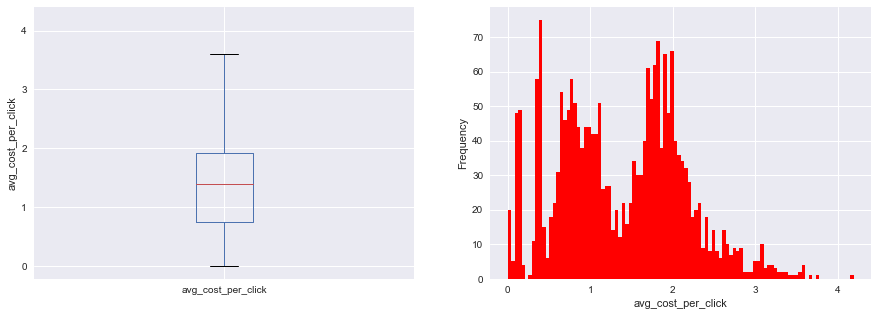

In [29]:
# avg_cost_per_click:

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
df.avg_cost_per_click.plot.box(ax = axes[0])
df.avg_cost_per_click.plot.hist(bins = 100, ax = axes[1], color = 'red')
axes[0].set_ylabel("avg_cost_per_click")
axes[1].set_xlabel("avg_cost_per_click")

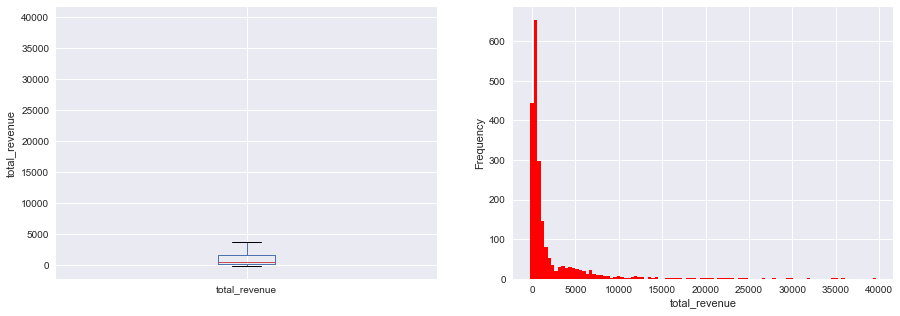

In [30]:
# total_revenue:

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
df.total_revenue.plot.box(ax = axes[0])
df.total_revenue.plot.hist(bins = 100, ax = axes[1], color = 'red')
axes[0].set_ylabel("total_revenue")
axes[1].set_xlabel("total_revenue")

In [31]:
### Checking for negative revenue values as the box plot clearly goes below zero

df[df['total_revenue'] < 0]

,date,shown,clicked,converted,avg_cost_per_click,total_revenue,ad
1186,2015-10-25,50459,1904,97,0.89,-200.15,ad_group_23
1404,2015-11-01,70145,584,15,0.36,-25.09,ad_group_27
1524,2015-11-15,22070,1400,20,1.67,-3.56,ad_group_29
2089,2015-10-28,80270,1151,41,0.96,-92.06,ad_group_40


Negative values are possible when the amount spent on ads is more than the return on investment. Hence, negative revenue is possible

### Data Sampling and Distribution

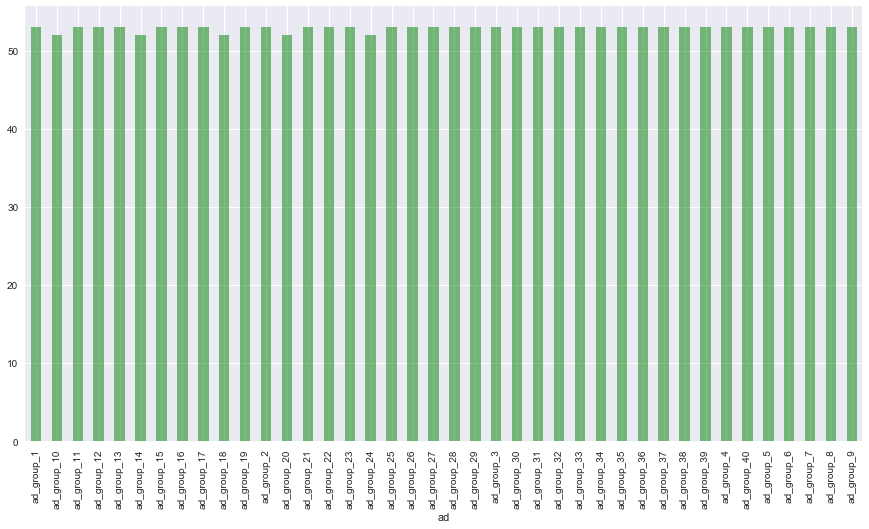

In [36]:
dff = df.groupby('ad')['shown'].count()
dff.plot.bar(color = 'g', alpha = 0.5, figsize = (15, 8))

The above bar chart clearly shows that we have almost equal number of data points for each ad group. So we could direct apply random sampling technique (Monte Carlo) to sample the data for modeling.

In case, the data is not uniformly distributed among the different ad groups, then we have to apply stratified sampling technique to pick sample data that represents the actual population. It is important to note that the stratified sampling is only applicable when we have similar dependancies between variables in each group such that the group category can be ignored in modeling.

### Scatter-plot

It is important to understand the relation between variables for modeling.

In case of:

1. 2 numerical variables, we can simple use scatter plot,
2. to study the relation between a numerical and a categorical variables we can use bar chart, and
3. to find the relation between 2 categorical variables, stacked column chart can be used.

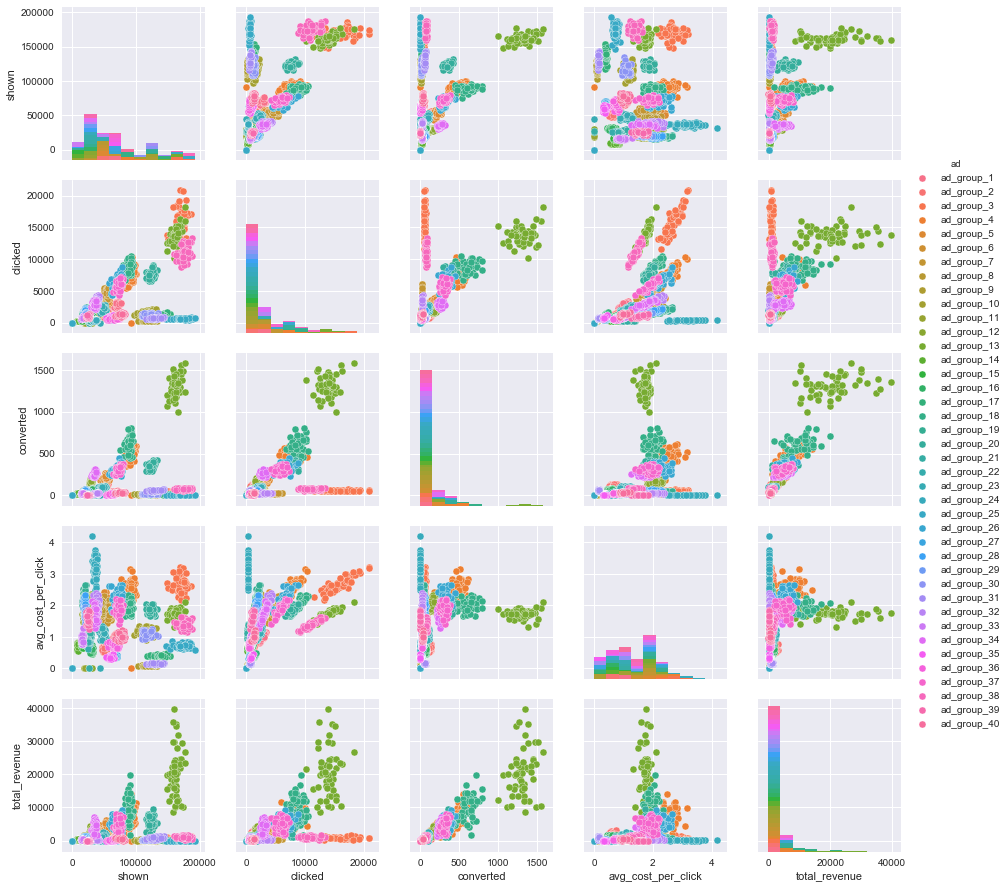

In [37]:
### Here, since all of them are numerical values

sns.pairplot(df[['shown', 'clicked', 'converted', 'avg_cost_per_click', 
                 'total_revenue', 'ad']], hue = 'ad')

Above pairplot shows no direct correlation between any of the variables in the table when data from all the groups combined are used. 

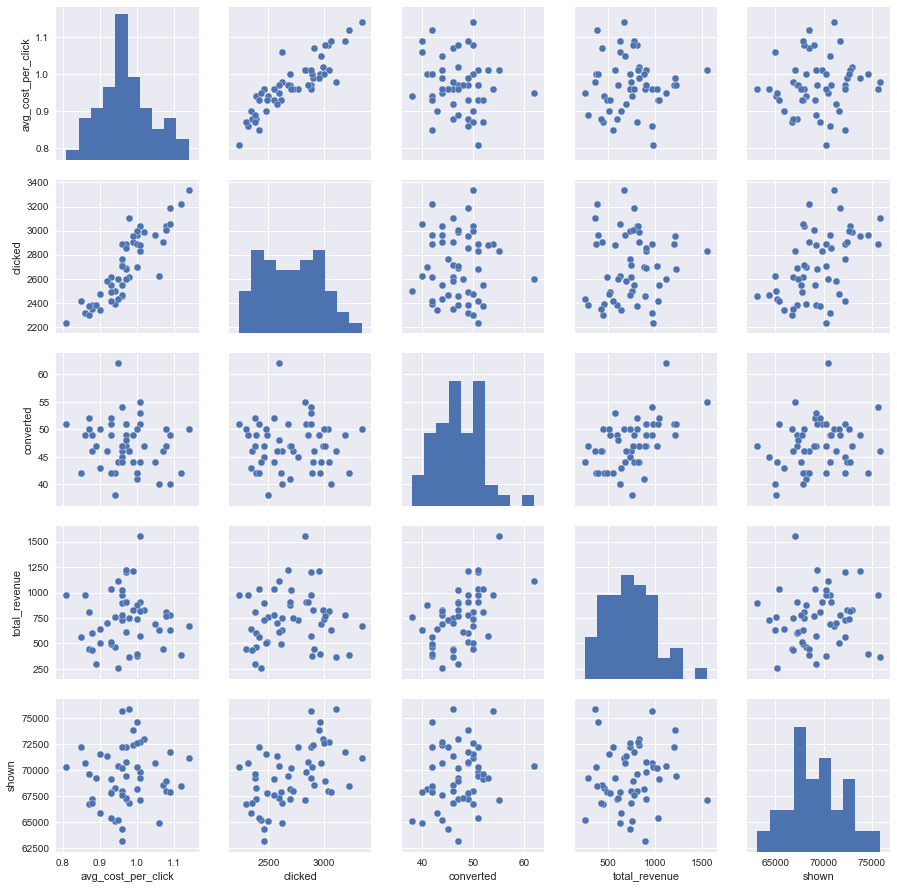

In [38]:
## Plotting the pairplots after segregating ad groups seperately
## For ad group 1

sns.pairplot(df.ix[df['ad'] == 'ad_group_1', {'shown', 'clicked', 'converted', 
                                              'avg_cost_per_click', 'total_revenue'}])

#### Notice how "avg_cost_per_click" and "clicked" are linearly related for ad group 1. 

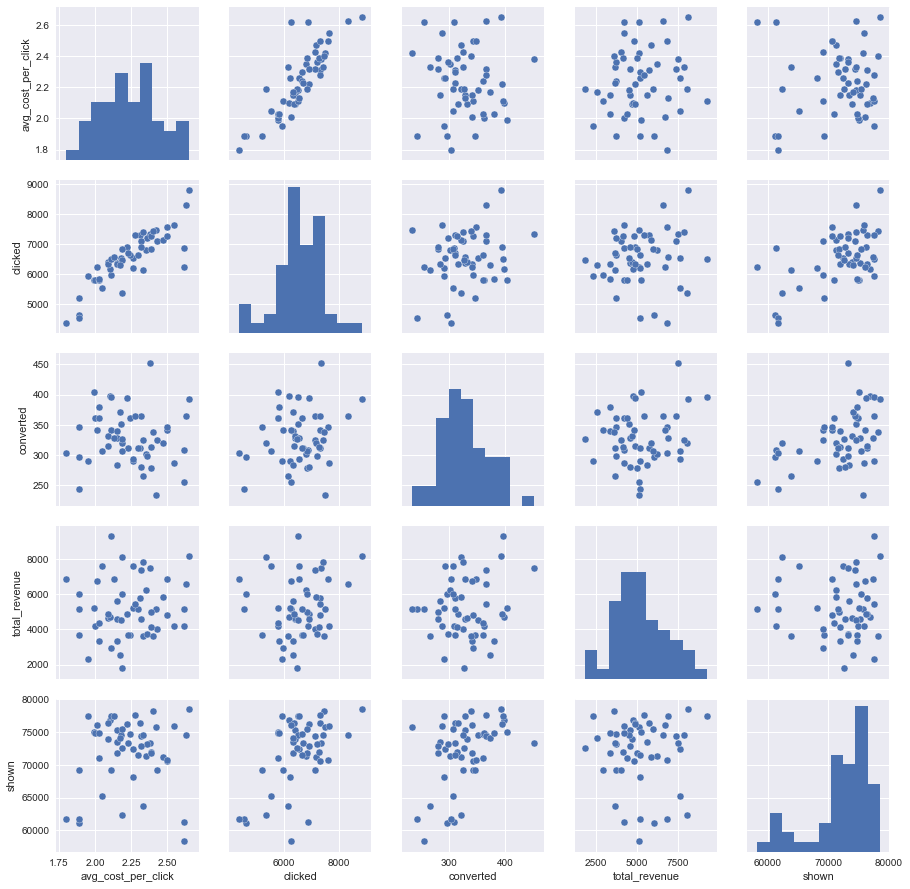

In [61]:
## For ad group 26

sns.pairplot(df.ix[df['ad'] == 'ad_group_26', {'shown', 'clicked', 'converted', 
                                              'avg_cost_per_click', 'total_revenue'}])

Notice the outliers that are apparent in many pair plot graphs here.

### Cleaning up the outliers

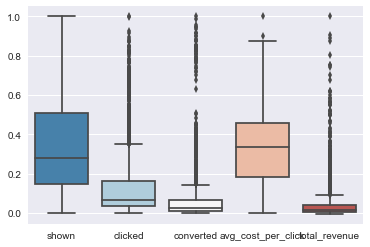

In [62]:
### Ratio of outliers

s = df[['shown', 'clicked', 'converted', 'avg_cost_per_click','total_revenue']]
ss = s / s.max()
sns.boxplot(ss, palette = 'RdBu_r')

When the data from all the groups are used to find the outliers, we get 100s of data points that are outside 3 standard deviations limit (~99.5 percentile limit). When we remove them blindly then we might accidentally drop many useful observations from the data. Therefore, I check for outliers in each group.

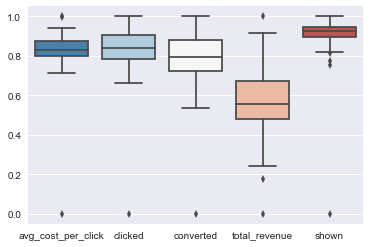

In [63]:
s = df.ix[df['ad'] == 'ad_group_5', {'shown', 'clicked', 'converted', 
                                     'avg_cost_per_click','total_revenue'}]
ss =  s / s.max()
sns.boxplot(ss, palette = 'RdBu_r')

In the above plot for the group 5, the outliers are just few and clearly distinct. Most importantly, it makes sense to remove outliers based on each group rather than all groups combined.

In [64]:
dff = df.copy(deep = True)

In [65]:
def remove_outliers(x):
    return x[(np.abs(stats.zscore(x)) < 3).all(axis = 1)]

In [66]:
columns = {'shown', 'clicked', 'converted', 'avg_cost_per_click','total_revenue'}
index_tobe_removed = []
# Implemented the follwing method as we have some columns with std == 0
for grp in dff.ad.unique():
    index_before = dff.ix[dff['ad'] == grp, columns].index.values # Index of each column
    dd_cols_std = dff.ix[(dff['ad'] == grp)].std() # columns to be considered
    dd_cols = list(dd_cols_std[dd_cols_std > 0].index.values) # removed cols with 0 std
    dd = remove_outliers( dff.ix[ (dff['ad'] == grp), dd_cols] )
    
    index_after = dd.index.values
    index_tobe_removed.extend(list(set(index_before) - set(index_after)))
    
print(index_tobe_removed)

[17, 28, 201, 204, 223, 525, 554, 570, 566, 580, 632, 607, 650, 676, 811, 821, 893, 899, 1000, 1005, 1057, 1091, 1211, 1175, 1215, 1273, 1471, 1556, 1697, 1737, 1744, 1843, 1852, 1928, 2089, 2062]


The data in above indices are deleted to remove the outliers in the data

1. Done this way because df(length = n) == df(length < n) - not possible to replace df of unequal
lengths. If it replacing with statistical mean or mode, it could be simply assigned (replaced). So select
only the indices of the data to be removed.

2. std is checked for each column separately and columns with same values is dropped otherwise all the
values are assumed to be outside 3 std limit as the std = 0. Then we will endup deleting the entire group

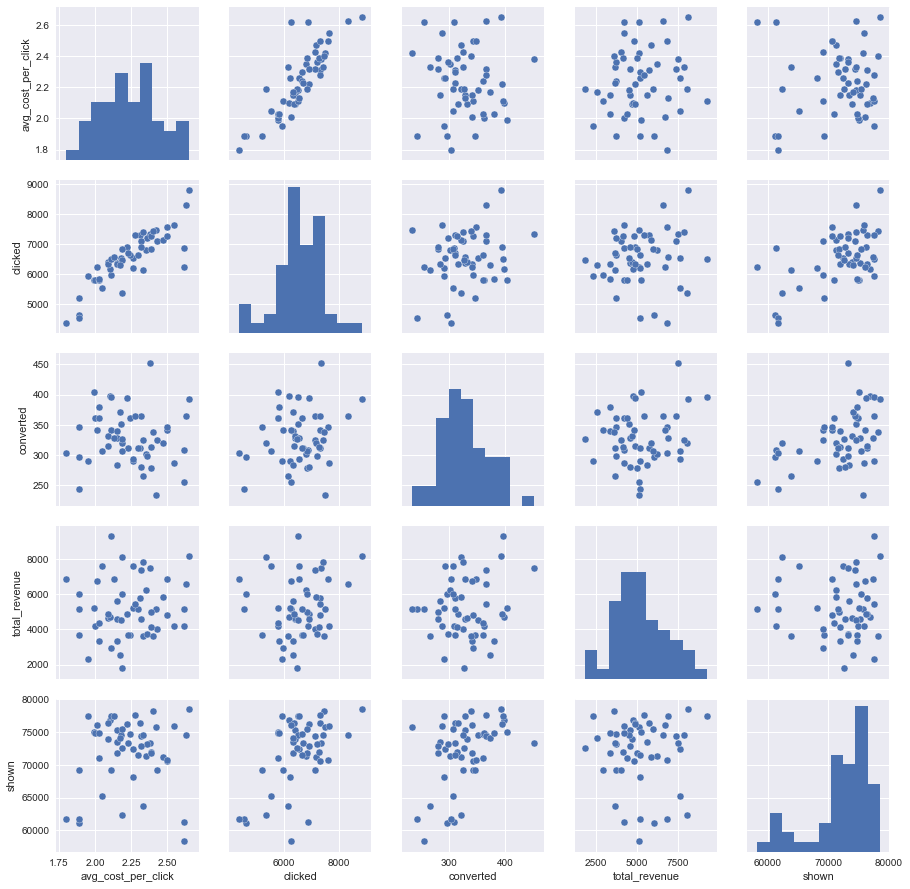

In [67]:
### Checking if the outliers are removed

sns.pairplot(dff.ix[dff['ad'] == 'ad_group_26', {'shown', 'clicked', 'converted', 
                                                'avg_cost_per_click', 'total_revenue'}])

#### Outliers are filtered out now.



## Feature Engineering

Adding metrics

* CTR - Click-through rate
* CR - Conversion rate
* business_day - working day (1) or holiday (0)
* Week_day - Day of the week (0-6 -> Monday to Sunday)
* Week_day_name - Name of the weekday

In [68]:
## Adding metrics CTR and CR

dff['CTR'] = dff['clicked'] / dff['shown']
dff['CR'] = dff['converted'] / dff['clicked']